# 비타 나이아신
- skincare3	[미백/잡티] 라운드랩 비타 나이아신 잡티 크림 50ml
- skincare4	[잡티청소] 라운드랩 비타 나이아신 잡티 세럼 30ml 기획 (+잡티크림 10ml 증정)

## 파일 불러오기

In [1]:
#skincare3 크림
import pandas as pd
file_path = r"C:\Users\82108\Downloads\제품리뷰전처리\skincare3_crc.xlsx"
skincare3_crc_df = pd.read_excel(file_path)
print(skincare3_crc_df)

                                                  0
0                                       세럼 같이 사용 어요
1                                         지성인 산뜻 어요
2                        앰풀 사용 더 듯 사용 여름 발라 갑갑 않 어요
3                              꾸준히 사용 조금 환하 느낌 들 어요
4                                          지성이 쓰 어요
..                                              ...
183                                           끈적이 ᆷ
184                     없이 쫀쫀 보습 감 싶 자꾸 화장 각질 들뜨 ᆫ다
185  잡티 미백 럼 사용 있 다 어차피 바르 크림 잡티 흔적 보살핌 기대 무조건 살 세요
186                                        만족 시 ᆸ니다
187                                   잡티 보살핌 중 꺾 어요

[188 rows x 1 columns]


In [2]:
#skincare4 세럼
import pandas as pd
file_path = r"C:\Users\82108\Downloads\제품리뷰전처리\skincare4_crc.xlsx"
skincare4_crc_df = pd.read_excel(file_path)
print(skincare4_crc_df)

                                                0
0                          확실히 비타민 유도체 자극 정말 없 어요
1                    저 자극 아예 안 느끼 매일 저녁 사용 주 있 어요
2                   달 동안 사용 결과 피부 색조 균일 조금 밝 같 어요
3                                거의 다 쓰 또 구매 같 어요
4                                        스타일 같 어요
...                                           ...
2531               피부 곧바로 흡수 비타민 제품 특유 끈적 없 아주 어요
2532                              만약 끈적 구매 안 듯 어요
2533  솔직히 미백 성분 데 자극 없 발림 특별 이유 없 데일리 기미 잡티 관리 제품
2534                                    제품 쓰 같 어요
2535                                특강 때 구매 같 습니다

[2536 rows x 1 columns]


In [3]:
import pandas as pd

# 데이터프레임을 리스트에 저장(단품)
dataframes_list1 = [
    skincare3_crc_df,
    skincare4_crc_df
]

dataframes_list1

[                                                  0
 0                                       세럼 같이 사용 어요
 1                                         지성인 산뜻 어요
 2                        앰풀 사용 더 듯 사용 여름 발라 갑갑 않 어요
 3                              꾸준히 사용 조금 환하 느낌 들 어요
 4                                          지성이 쓰 어요
 ..                                              ...
 183                                           끈적이 ᆷ
 184                     없이 쫀쫀 보습 감 싶 자꾸 화장 각질 들뜨 ᆫ다
 185  잡티 미백 럼 사용 있 다 어차피 바르 크림 잡티 흔적 보살핌 기대 무조건 살 세요
 186                                        만족 시 ᆸ니다
 187                                   잡티 보살핌 중 꺾 어요
 
 [188 rows x 1 columns],
                                                 0
 0                          확실히 비타민 유도체 자극 정말 없 어요
 1                    저 자극 아예 안 느끼 매일 저녁 사용 주 있 어요
 2                   달 동안 사용 결과 피부 색조 균일 조금 밝 같 어요
 3                                거의 다 쓰 또 구매 같 어요
 4                                        스타일 같 어요
 ...                           

# 비타나이아신 감성분석

In [4]:
# 형태소 분석기
from konlpy.tag import Okt
okt = Okt()

# SentiWord_Dict.txt 감성사전 불러오기
def load_senti_dict(file_path):
    senti_dict = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()  # 공백으로 분리
            if len(parts) > 1:
                word = ' '.join(parts[:-1])  # 마지막 항목을 제외한 나머지를 단어로 결합
                score = int(parts[-1])  # 마지막 항목을 점수로 처리
                senti_dict[word] = score
            else:
                print(f"해당 줄을 무시합니다: {line}")
    return senti_dict

# 감성 사전 로드
senti_dict = load_senti_dict(r"C:\Users\82108\Downloads\KnuSentiLex-master(1)\KnuSentiLex-master\SentiWord_Dict.txt")

# 감성 분석 함수 
def analyze_sentiment(text, senti_dict):
    # 형태소 분석
    morphs = okt.morphs(text)
    
    # 감정 점수 계산
    sentiment_score = 0
    for word in morphs:
        if word in senti_dict:  # 단어가 사전에 있는 경우
            sentiment_score += senti_dict[word]
    
    # 점수에 따라 감정 판단
    if sentiment_score > 0:
        return "긍정"
    elif sentiment_score < 0:
        return "부정"
    else:
        return "중립"

## 긍정/부정/중립

In [5]:
#단품 리스트
# 데이터프레임과 이름을 튜플로 저장
dataframes = [
    ("skincare3_crc_df", skincare3_crc_df),
    ("skincare4_crc_df", skincare4_crc_df),
]

results_list = []

# 각 데이터프레임 처리 및 결과 출력
for name, df in dataframes:
    print(f"Processing DataFrame: {name}")
    
    # 텍스트를 리스트로 변환
    skincare_text_list1 = df.iloc[:, 0].astype(str).tolist()
    
    # 감성 분석 수행
    skincare_results1 = [(text, analyze_sentiment(text, senti_dict)) for text in skincare_text_list1]
    
    # 결과 데이터프레임 생성
    skincare_results1_df = pd.DataFrame(skincare_results1, columns=['Text', 'Sentiment'])
    
    # 결과를 리스트에 저장
    results_list.append((name, skincare_results1_df))
    
    # 결과 출력
    print(skincare_results1_df)
    print("\n")  # 각 데이터프레임 결과 사이에 공백 추가

Processing DataFrame: skincare3_crc_df
                                               Text Sentiment
0                                       세럼 같이 사용 어요        중립
1                                         지성인 산뜻 어요        중립
2                        앰풀 사용 더 듯 사용 여름 발라 갑갑 않 어요        중립
3                              꾸준히 사용 조금 환하 느낌 들 어요        긍정
4                                          지성이 쓰 어요        중립
..                                              ...       ...
183                                           끈적이 ᆷ        중립
184                     없이 쫀쫀 보습 감 싶 자꾸 화장 각질 들뜨 ᆫ다        중립
185  잡티 미백 럼 사용 있 다 어차피 바르 크림 잡티 흔적 보살핌 기대 무조건 살 세요        긍정
186                                        만족 시 ᆸ니다        긍정
187                                   잡티 보살핌 중 꺾 어요        중립

[188 rows x 2 columns]


Processing DataFrame: skincare4_crc_df
                                             Text Sentiment
0                          확실히 비타민 유도체 자극 정말 없 어요        중립
1                    저 자극 아예 안 느

## 긍정/부정/중립 리스트 만들기

In [6]:
import pandas as pd
from konlpy.tag import Okt

# 형태소 분석기 초기화
okt = Okt()

# 감성 분석 함수 정의
def analyze_sentiment(text, senti_dict):
    # 형태소 분석
    morphs = okt.morphs(text)
    
    # 감정 점수 계산
    sentiment_score = 0
    for word in morphs:
        if word in senti_dict:  # 단어가 사전에 있는 경우
            sentiment_score += senti_dict[word]
    
    # 점수에 따라 감정 판단
    if sentiment_score > 0:
        return "긍정"
    elif sentiment_score < 0:
        return "부정"
    else:
        return "중립"


# 데이터프레임과 이름을 튜플로 저장
dataframes = [
    ("skincare3_crc_df", skincare3_crc_df),
    ("skincare4_crc_df", skincare4_crc_df),
]

# 결과를 저장할 딕셔너리 (각 데이터프레임별로)
results_dict = {}

# 각 데이터프레임 처리 및 감정 분석 수행
for name, df in dataframes:
    print(f"Processing DataFrame: {name}")
    
    # 텍스트를 리스트로 변환
    text_list = df.iloc[:, 0].astype(str).tolist()
    
    # 긍정, 부정, 중립 리스트 초기화
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # 감성 분석 수행 및 리스트에 저장
    for text in text_list:
        sentiment = analyze_sentiment(text, senti_dict)
        if sentiment == "긍정":
            positive_list.append(text)
        elif sentiment == "부정":
            negative_list.append(text)
        else:
            neutral_list.append(text)
    
    # 결과를 각 데이터프레임 이름별로 저장
    results_dict[name] = {
        "긍정": positive_list,
        "부정": negative_list,
        "중립": neutral_list
    }


Processing DataFrame: skincare3_crc_df
Processing DataFrame: skincare4_crc_df


In [7]:
results_dict['skincare3_crc_df']

{'긍정': ['꾸준히 사용 조금 환하 느낌 들 어요',
  '처음 보통 싶 쓰 쓰 만족 자극 없 순하 촉촉하 피부 편하 비타민 크림 개',
  '여름 자외선 때문 진정 크림 바르 자 전 번 바르 자 생각 기미 잘 안 생기 어요',
  '꾸준히 바르 같 어요',
  '엄마 쓰 시 눈가 주름 개선 많이 되 피부 색조 좀 밝 시 대요',
  '사람 다르 옆 보 저 입장 좀 개선 보이 ᆸ니다',
  '효과 아직 잘 모르 꾸준히 바르 있 어요',
  '니 알 시 아마이드 너무 너무 잘 맞 좋아하 많이 들어가 점 무엇 정제 수 대신 가 매 보리수나무 수 딱',
  '며칠 사용 보 보습 진정 도움 되 같 어요',
  '미백 크림 보습 괜찮 여름 잘 쓰 있 어요',
  '모두 잘 쓰 세요',
  '약간 끈적거리 잘 펴 발리 흡수 잘 되 같 화장 전 사용 보 피부 쫀쫀 자주 사용 같 어요',
  '엄마 눈가 주름 개선 얼굴 타 부분 열심히 바르 계시 어요',
  '좀 많이 개선 어요',
  '않 여름 땀 많이 나 덕 바르 보습 잘 되 빨리 흡수 되 기름 많 피부 듯 ᆸ니다',
  '다이내믹 피부 꾸준히 바르 보 어요',
  '적당 가격 잘 구매 생각 제품 ᆸ니다',
  '나이 들 피부 칙칙 주름 늘 가 건조 촉촉 피부 감싸 피부 밝 주 제품 필요 잡티 크림 구매 잡티 럼 함께 구매 아침 보다 빨리 스며들 럼 밤 크림 사용 보 피부 맑 촉촉 크림 세럼 모두 구매 싶 다',
  '여름 잡티 많이 생기 밤 보습 후 바르 잠 뚜렷 효과 모르 꾸준히 바르 보 렵니다',
  '꾸준히 잘 쓰 있 제품 에요',
  '라운드 랩 비 다 니아 잡티 크림 잡티 피부 색조 개선 위하 개발 기능 크림 에요',
  '꾸준히 사용 피부 색조 균일 맑 투명 피부 가꾸 주 점 많 사용자 만족 있 습니다',
  '라운드 랩 비 다 니아 잡티 크림 피부 잡티 톤 개선 원하 분 적극 추천 드리 어요',
  '잘 쓰 있 습니다',
  '햇빛 많이 바 비타민 필요 감사 보 어요 가성비 괜찮 듯',
  '어버이날 

In [8]:
#결과 수 확인
df_name = 'skincare3_crc_df'

if df_name in results_dict:
    # 긍정 항목의 수 출력
    positive_count = len(results_dict[df_name]['긍정'])
    print(f"긍정 항목의 수 for {df_name}: {positive_count}")

    # 부정 항목의 수 출력
    negative_count = len(results_dict[df_name]['부정'])
    print(f"부정 항목의 수 for {df_name}: {negative_count}")

    # 중립 항목의 수 출력
    neutral_count = len(results_dict[df_name]['중립'])
    print(f"중립 항목의 수 for {df_name}: {neutral_count}")

    # 전체 항목의 수 계산 및 출력
    total_count = positive_count + negative_count + neutral_count
    print(f"\n전체 항목의 수 for {df_name}: {total_count}")
else:
    print(f"No results found for {df_name}")


긍정 항목의 수 for skincare3_crc_df: 49
부정 항목의 수 for skincare3_crc_df: 7
중립 항목의 수 for skincare3_crc_df: 132

전체 항목의 수 for skincare3_crc_df: 188


In [9]:
#결과 수 확인
df_name = 'skincare4_crc_df'

if df_name in results_dict:
    # 긍정 항목의 수 출력
    positive_count = len(results_dict[df_name]['긍정'])
    print(f"긍정 항목의 수 for {df_name}: {positive_count}")

    # 부정 항목의 수 출력
    negative_count = len(results_dict[df_name]['부정'])
    print(f"부정 항목의 수 for {df_name}: {negative_count}")

    # 중립 항목의 수 출력
    neutral_count = len(results_dict[df_name]['중립'])
    print(f"중립 항목의 수 for {df_name}: {neutral_count}")

    # 전체 항목의 수 계산 및 출력
    total_count = positive_count + negative_count + neutral_count
    print(f"\n전체 항목의 수 for {df_name}: {total_count}")
else:
    print(f"No results found for {df_name}")


긍정 항목의 수 for skincare4_crc_df: 764
부정 항목의 수 for skincare4_crc_df: 93
중립 항목의 수 for skincare4_crc_df: 1679

전체 항목의 수 for skincare4_crc_df: 2536


In [10]:
# 특정 데이터프레임의 긍정, 부정, 중립 결과를 한 번에 출력하는 코드
df_name = 'skincare3_crc_df'

if df_name in results_dict:
    #print(f"긍정 리스트 for {df_name}:")
    #for item in results_dict[df_name]['긍정']:
        #print(f"- {item}")
    
    print("\n부정 리스트:")
    for item in results_dict[df_name]['부정']:
        print(f"- {item}")

    #print("\n중립 리스트:")
    #for item in results_dict[df_name]['중립']:
        #print(f"- {item}")
else:
    print(f"No results found for {df_name}")



부정 리스트:
- 같 물 그냥 맹물 첨가 물 더 죠 유효 성분 최고 다 입구 뾰족 더라고 저 형 않 비비 너무 않 날 부담 없이 바르 같 어요 흡수 금방 되 끈적거리 없 번들거리 않 습니다 아침 낮 바르 부담 없 어요 물론 서 크림 필수 비타민 씨 유도체 즉각 효과 보 달 이상 꾸준히 바르 쓰 보 정도 티 나 그리 예민 피부 자극 하나 없 세상 순 부담 없이 관리 듯 ᆸ니다
- 수분 부족 지성 스킨 앰풀 바르 마지막 바르 보습 감 없 유분 심 피부 수분 장벽 균형 다 무너지 뾰루지 왕창 올라오 어요
- 미백 효과 확인 전 피부 다 뒤집어지 수분 부족 지성 지성 분 듯 극 추천 않 습니다
- 또 피부 진정 성분 포함 있 민감 피부 부담 없이 사용 수 있 어요
- 어제 처음 사용 보 뒤집히 뾰루지 올라오 부작용 없 어요
- 같 물 그냥 맹물 첨가 물 더 죠 유효 성분 최고 다 입구 뾰족 더라고 저 형 않 비비 너무 않 날 부담 없이 바르 같 어요 흡수 금방 되 끈적거리 없 번들거리 않 습니다 아침 낮 바르 부담 없 어요 물론 서 크림 필수 비타민 씨 유도체 즉각 효과 보 달 이상 꾸준히 바르 쓰 보 정도 티 나 그리 예민 피부 자극 하나 없 세상 순 부담 없이 관리 듯 ᆸ니다
- 요즘 잡티 때문 스트레스 순하 미백 앰풀 찾 크림 같이 사용 듯 세트 사 어요


## 엑셀로 저장하기

In [11]:
#단품 리스트
import pandas as pd

# 결과를 저장할 경로 설정
output_dir = r"C:\Users\82108\Downloads"

# 각 데이터프레임 처리 및 엑셀 파일로 저장
for df_name in results_dict:
    # 긍정 리스트를 데이터프레임으로 변환 및 저장
    skincare_positive_df = pd.DataFrame({'Text': results_dict[df_name]['긍정']})
    skincare_positive_df.to_excel(f"{output_dir}\{df_name}_positive_list_N.xlsx", index=False)

    # 부정 리스트를 데이터프레임으로 변환 및 저장
    skincare_negative_df = pd.DataFrame({'Text': results_dict[df_name]['부정']})
    skincare_negative_df.to_excel(f"{output_dir}\{df_name}_negative_list_N.xlsx", index=False)

    # 중립 리스트를 데이터프레임으로 변환 및 저장
    #skincare_neutral_df = pd.DataFrame({'Text': results_dict[df_name]['중립']})
    #skincare_neutral_df.to_excel(f"{output_dir}\{df_name}_neutral_list.xlsx", index=False)

    print(f"{df_name} 데이터프레임의 긍정, 부정 리스트가 각각 엑셀 파일로 저장되었습니다.")


skincare3_crc_df 데이터프레임의 긍정, 부정 리스트가 각각 엑셀 파일로 저장되었습니다.
skincare4_crc_df 데이터프레임의 긍정, 부정 리스트가 각각 엑셀 파일로 저장되었습니다.


# 비타나이아신 빈도분석

## 엑셀파일 불러오기

In [12]:
import pandas as pd

# 불러올 파일 경로 설정
output_dir = r"C:\Users\82108\Downloads"

# 불러올 데이터프레임 목록
df_names = [
    'skincare3_crc_df',
    'skincare4_crc_df',
]

# 각 데이터프레임 이름별로 데이터를 불러와 개별 변수에 저장
for df_name in df_names:
    # 긍정 리스트 엑셀 파일 불러오기
    positive_df = pd.read_excel(f"{output_dir}\{df_name}_positive_list_N.xlsx")
    positive_var_name = f"{df_name.replace('_df', '')}_positive_list_df"
    globals()[positive_var_name] = positive_df

    # 부정 리스트 엑셀 파일 불러오기
    negative_df = pd.read_excel(f"{output_dir}\{df_name}_negative_list_N.xlsx")
    negative_var_name = f"{df_name.replace('_df', '')}_negative_list_df"
    globals()[negative_var_name] = negative_df

    # 중립 리스트 엑셀 파일 불러오기 (필요한 경우)
    # neutral_df = pd.read_excel(f"{output_dir}\{df_name}_neutral_list.xlsx")
    # neutral_var_name = f"{df_name.replace('_df', '')}_neutral_list_df"
    # globals()[neutral_var_name] = neutral_df

# 예시: skincare12_crc_positive_list_df 출력해보기
print(skincare3_crc_positive_list_df.head())
print(skincare3_crc_negative_list_df.head())


                                            Text
0                           꾸준히 사용 조금 환하 느낌 들 어요
1      처음 보통 싶 쓰 쓰 만족 자극 없 순하 촉촉하 피부 편하 비타민 크림 개
2  여름 자외선 때문 진정 크림 바르 자 전 번 바르 자 생각 기미 잘 안 생기 어요
3                                    꾸준히 바르 같 어요
4            엄마 쓰 시 눈가 주름 개선 많이 되 피부 색조 좀 밝 시 대요
                                                Text
0  같 물 그냥 맹물 첨가 물 더 죠 유효 성분 최고 다 입구 뾰족 더라고 저 형 않 ...
1  수분 부족 지성 스킨 앰풀 바르 마지막 바르 보습 감 없 유분 심 피부 수분 장벽 ...
2    미백 효과 확인 전 피부 다 뒤집어지 수분 부족 지성 지성 분 듯 극 추천 않 습니다
3              또 피부 진정 성분 포함 있 민감 피부 부담 없이 사용 수 있 어요
4                    어제 처음 사용 보 뒤집히 뾰루지 올라오 부작용 없 어요


In [13]:
print(skincare4_crc_positive_list_df.head())
print(skincare4_crc_negative_list_df.head())

                                                Text
0             보습 느끼 제형 지성 사용 증정 미니 크림 여행 가 때 잘 사용 어요
1        자극 없 보습 느끼 제형 지성 사용 증정 미니 크림 여행 가 때 잘 사용 어요
2             보습 느끼 제형 지성 사용 증정 미니 크림 여행 가 때 잘 사용 어요
3                                             만족 ᆸ니다
4  장점 순하 찌 득 거리 않 보습 잘 되 화장 잘 먹 냄새 역 않 순하 트러블 안 나 ᆫ다
                                                Text
0                         또 저 여드름 심하 나 피부 흉터 반점 많 어요
1                                      피부염 있 민감 사용 안
2            그래도 사용 감 화장 때 부담 없이 사용 수 있 데일리 사용 딱 습니다
3                        여드름 흉터 자 전 소량 바르 흉터 그대로 습니다
4  같 물 그냥 맹물 첨가 물 더 죠 유효 성분 최고 다 미백 기능 제품 제형 않 비비...


In [14]:
#긍정리스트
positive_list_dfs = [skincare3_crc_positive_list_df, skincare4_crc_positive_list_df]
positive_list_dfs

[                                                 Text
 0                                꾸준히 사용 조금 환하 느낌 들 어요
 1           처음 보통 싶 쓰 쓰 만족 자극 없 순하 촉촉하 피부 편하 비타민 크림 개
 2       여름 자외선 때문 진정 크림 바르 자 전 번 바르 자 생각 기미 잘 안 생기 어요
 3                                         꾸준히 바르 같 어요
 4                 엄마 쓰 시 눈가 주름 개선 많이 되 피부 색조 좀 밝 시 대요
 5                          사람 다르 옆 보 저 입장 좀 개선 보이 ᆸ니다
 6                              효과 아직 잘 모르 꾸준히 바르 있 어요
 7   니 알 시 아마이드 너무 너무 잘 맞 좋아하 많이 들어가 점 무엇 정제 수 대신 가...
 8                             며칠 사용 보 보습 진정 도움 되 같 어요
 9                             미백 크림 보습 괜찮 여름 잘 쓰 있 어요
 10                                          모두 잘 쓰 세요
 11  약간 끈적거리 잘 펴 발리 흡수 잘 되 같 화장 전 사용 보 피부 쫀쫀 자주 사용 ...
 12                   엄마 눈가 주름 개선 얼굴 타 부분 열심히 바르 계시 어요
 13                                         좀 많이 개선 어요
 14      않 여름 땀 많이 나 덕 바르 보습 잘 되 빨리 흡수 되 기름 많 피부 듯 ᆸ니다
 15                                다이내믹 피부 꾸준히 바르 보 어요
 16                               적당 가격 잘 구매 생각 제품 ᆸ니다
 17  나이 들 

In [15]:
#부정리스트
negative_list_dfs = [skincare3_crc_negative_list_df, skincare4_crc_negative_list_df]
negative_list_dfs

[                                                Text
 0  같 물 그냥 맹물 첨가 물 더 죠 유효 성분 최고 다 입구 뾰족 더라고 저 형 않 ...
 1  수분 부족 지성 스킨 앰풀 바르 마지막 바르 보습 감 없 유분 심 피부 수분 장벽 ...
 2    미백 효과 확인 전 피부 다 뒤집어지 수분 부족 지성 지성 분 듯 극 추천 않 습니다
 3              또 피부 진정 성분 포함 있 민감 피부 부담 없이 사용 수 있 어요
 4                    어제 처음 사용 보 뒤집히 뾰루지 올라오 부작용 없 어요
 5  같 물 그냥 맹물 첨가 물 더 죠 유효 성분 최고 다 입구 뾰족 더라고 저 형 않 ...
 6        요즘 잡티 때문 스트레스 순하 미백 앰풀 찾 크림 같이 사용 듯 세트 사 어요,
                                                  Text
 0                          또 저 여드름 심하 나 피부 흉터 반점 많 어요
 1                                       피부염 있 민감 사용 안
 2             그래도 사용 감 화장 때 부담 없이 사용 수 있 데일리 사용 딱 습니다
 3                         여드름 흉터 자 전 소량 바르 흉터 그대로 습니다
 4   같 물 그냥 맹물 첨가 물 더 죠 유효 성분 최고 다 미백 기능 제품 제형 않 비비...
 ..                                                ...
 88       매번 수분 럼 진정 럼 돌아오 이유 보습 부족 끈적 얼굴 보이 이유 있 같 네요
 89                     어느새 순식 늘어나 잡티 때문 스트레스 이만저만 ᆸ니다
 90  같 물 그냥 맹물 첨가 물 더 죠 유효 성분 최고 다 미백 기능 제품 제형 않 비비...
 91   비타민 제품 잘못 사

## 긍정(30개추출)

In [16]:
import pandas as pd
from collections import Counter

positive_list_dfs = [
    ('skincare3_crc_positive_list_df', skincare3_crc_positive_list_df),
    ('skincare4_crc_positive_list_df', skincare4_crc_positive_list_df)
]

positive_list_df_results = []

# 각 데이터프레임을 순차적으로 처리합니다.
for name, df in positive_list_dfs:
    # 텍스트 열에서 단어를 추출하여 리스트로 만듭니다.
    words = df['Text'].str.split().sum()
    
    # 단어 빈도 계산
    words_freq = Counter(words)
    
    # 빈도 데이터를 데이터프레임으로 변환하고 정렬합니다.
    words_freq_df = pd.DataFrame(words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
    
    # 결과를 리스트에 추가합니다.
    positive_list_df_results.append((name, words_freq_df))

# 각 데이터프레임의 결과를 출력합니다. (예를 들어, 상위 10개 단어를 출력)
for name, positive_list_result_df in positive_list_df_results:
    print(f"{name}의 상위 10개 단어:")
    print(positive_list_result_df.head(10))
    print("\n")


skincare3_crc_positive_list_df의 상위 10개 단어:
    단어  빈도
0    잘  22
1   어요  22
2    쓰  19
3   피부  18
4   크림  13
5    있  12
6   바르  12
7  꾸준히  12
8   사용  11
9    보  11


skincare4_crc_positive_list_df의 상위 10개 단어:
    단어   빈도
0   어요  328
1    잘  289
2    있  233
3    보  227
4  꾸준히  212
5    쓰  212
6   잡티  201
7   피부  200
8   사용  179
9   바르  173




In [17]:
# 특정 데이터프레임의 긍정 키워드만 보고 싶다면
def print_keywords_by_name(df_name):
    # 결과 리스트에서 특정 데이터프레임의 이름과 결과를 찾습니다.
    for name, result_df in positive_list_df_results:
        if name == df_name:
            print(f"{name}의 상위 30개 단어:")
            print(result_df.head(30))
            break
    else:
        print(f"{df_name} 데이터프레임을 찾을 수 없습니다.")

print_keywords_by_name('skincare3_crc_positive_list_df')

skincare3_crc_positive_list_df의 상위 30개 단어:
     단어  빈도
0     잘  22
1    어요  22
2     쓰  19
3    피부  18
4    크림  13
5     있  12
6    바르  12
7   꾸준히  12
8    사용  11
9     보  11
10   잡티  10
11   개선   8
12   만족   7
13   효과   7
14    되   7
15   많이   7
16    다   6
17  ᆸ니다   6
18    같   6
19   모르   6
20   너무   5
21   보습   5
22    수   5
23    시   5
24    가   5
25   구매   5
26   제품   5
27   여름   4
28    들   4
29    럼   4


In [18]:
# 특정 데이터프레임의 긍정 키워드만 보고 싶다면
def print_keywords_by_name(df_name):
    # 결과 리스트에서 특정 데이터프레임의 이름과 결과를 찾습니다.
    for name, result_df in positive_list_df_results:
        if name == df_name:
            print(f"{name}의 상위 30개 단어:")
            print(result_df.head(30))
            break
    else:
        print(f"{df_name} 데이터프레임을 찾을 수 없습니다.")

print_keywords_by_name('skincare4_crc_positive_list_df')

skincare4_crc_positive_list_df의 상위 30개 단어:
     단어   빈도
0    어요  328
1     잘  289
2     있  233
3     보  227
4   꾸준히  212
5     쓰  212
6    잡티  201
7    피부  200
8    사용  179
9    바르  173
10    되  122
11    같  117
12   효과   96
13    주   92
14   만족   92
15   제품   84
16  ᆸ니다   81
17   구매   81
18   크림   80
19    럼   77
20    없   77
21   흡수   71
22    않   68
23   자극   64
24  습니다   63
25   개선   60
26   미백   60
27    수   57
28   네요   56
29   없이   53


## 부정(30개추출)

In [19]:
import pandas as pd
from collections import Counter

negative_list_dfs = [
    ('skincare3_crc_negative_list_df', skincare3_crc_negative_list_df),
    ('skincare4_crc_negative_list_df', skincare4_crc_negative_list_df),
]

negative_list_df_results = []

# 각 데이터프레임을 순차적으로 처리합니다.
for name, df in negative_list_dfs:
    # 텍스트 열에서 단어를 추출하여 리스트로 만듭니다.
    words = df['Text'].str.split().sum()
    
    # 단어 빈도 계산
    words_freq = Counter(words)
    
    # 빈도 데이터를 데이터프레임으로 변환하고 정렬합니다.
    words_freq_df = pd.DataFrame(words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
    
    # 결과를 리스트에 추가합니다.
    negative_list_df_results.append((name, words_freq_df))

# 각 데이터프레임의 결과를 출력합니다. (예를 들어, 상위 10개 단어를 출력)
for name, negative_list_result_df in negative_list_df_results:
    print(f"{name}의 상위 10개 단어:")
    print(negative_list_result_df.head(10))
    print("\n")


skincare3_crc_negative_list_df의 상위 10개 단어:
   단어  빈도
0   없   8
1  어요   8
2  바르   8
3  부담   7
4   않   7
5  피부   6
6   보   5
7  없이   5
8   듯   4
9   물   4


skincare4_crc_negative_list_df의 상위 10개 단어:
   단어  빈도
0  어요  44
1  잡티  41
2  피부  37
3   있  30
4   같  24
5  바르  23
6  부담  23
7   없  20
8   않  20
9  사용  19




In [20]:
# 특정 데이터프레임의 부정 키워드만 보고 싶다면
def print_keywords_by_name(df_name):
    # 결과 리스트에서 특정 데이터프레임의 이름과 결과를 찾습니다.
    for name, result_df in negative_list_df_results:
        if name == df_name:
            print(f"{name}의 상위 30개 단어:")
            print(result_df.head(30))
            break
    else:
        print(f"{df_name} 데이터프레임을 찾을 수 없습니다.")

# 예: 'skincare12_crc_negative_list_df'의 상위 30개 단어 출력
print_keywords_by_name('skincare3_crc_negative_list_df')

skincare3_crc_negative_list_df의 상위 30개 단어:
     단어  빈도
0     없   8
1    어요   8
2    바르   8
3    부담   7
4     않   7
5    피부   6
6     보   5
7    없이   5
8     듯   4
9     물   4
10    같   4
11    다   4
12   효과   3
13   사용   3
14   지성   3
15   크림   3
16   성분   3
17  습니다   3
18   수분   3
19    있   2
20    달   2
21   이상   2
22  꾸준히   2
23    쓰   2
24   정도   2
25    티   2
26    나   2
27   부족   2
28   그리   2
29   미백   2


In [21]:
# 특정 데이터프레임의 부정 키워드만 보고 싶다면
def print_keywords_by_name(df_name):
    # 결과 리스트에서 특정 데이터프레임의 이름과 결과를 찾습니다.
    for name, result_df in negative_list_df_results:
        if name == df_name:
            print(f"{name}의 상위 30개 단어:")
            print(result_df.head(30))
            break
    else:
        print(f"{df_name} 데이터프레임을 찾을 수 없습니다.")

# 예: 'skincare12_crc_negative_list_df'의 상위 30개 단어 출력
print_keywords_by_name('skincare4_crc_negative_list_df')

skincare4_crc_negative_list_df의 상위 30개 단어:
      단어  빈도
0     어요  44
1     잡티  41
2     피부  37
3      있  30
4      같  24
5     바르  23
6     부담  23
7      없  20
8      않  20
9     사용  19
10    자극  18
11    없이  18
12     보  17
13    걱정  17
14     수  15
15     럼  14
16  스트레스  14
17   비타민  14
18    너무  12
19     많  12
20    네요  12
21     편  11
22    기미  11
23    흉터  11
24     되  10
25     나  10
26   여드름   9
27     쓰   9
28    제품   9
29     잘   9


## 중복제거

In [22]:
# import pandas as pd

# # 각 스킨케어 데이터프레임의 고유 부정 및 긍정 단어를 저장할 딕셔너리
# skincare_unique_negative_words = {}
# skincare_unique_positive_words = {}

# # negative_list_df_results와 positive_list_df_results가 있다고 가정
# # negative_list_df_results와 positive_list_df_results는 각각 부정, 긍정 단어의 빈도 데이터프레임을 포함하는 리스트입니다.

# # 각 스킨케어 데이터프레임을 순차적으로 처리
# for neg_item, pos_item in zip(negative_list_df_results, positive_list_df_results):
#     neg_name, negative_df = neg_item  # 부정 리스트
#     pos_name, positive_df = pos_item  # 긍정 리스트
    
#     # 부정 및 긍정 프레임의 단어 리스트 추출
#     negative_words = set(negative_df.head(30)['단어'])
#     positive_words = set(positive_df.head(30)['단어'])
    
#     # 중복 단어 필터링 (부정 및 긍정에 공통으로 있는 단어를 제거)
#     common_words = negative_words & positive_words
    
#     # 중복 단어를 제외한 부정 단어 리스트
#     unique_negative_words = [word for word in negative_words if word not in common_words]
    
#     # 중복 단어를 제외한 긍정 단어 리스트
#     unique_positive_words = [word for word in positive_words if word not in common_words]
    
#     # 각 스킨케어 이름에 고유한 부정 및 긍정 단어 리스트를 딕셔너리에 저장
#     skincare_unique_negative_words[neg_name] = unique_negative_words
#     skincare_unique_positive_words[pos_name] = unique_positive_words

# # 예시 출력: 각 스킨케어의 고유 부정 및 긍정 단어 리스트 출력
# for neg_name in skincare_unique_negative_words:
#     print(f"{neg_name}의 고유 부정 단어 리스트:")
#     print(skincare_unique_negative_words[neg_name])
#     print("\n")

# for pos_name in skincare_unique_positive_words:
#     print(f"{pos_name}의 고유 긍정 단어 리스트:")
#     print(skincare_unique_positive_words[pos_name])
#     print("\n")


In [23]:
#이걸로 해야 word clolud 할 수 있다~
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 각 스킨케어 데이터프레임의 고유 부정 및 긍정 단어를 저장할 딕셔너리
skincare_unique_negative_words = {}
skincare_unique_positive_words = {}

# negative_list_df_results와 positive_list_df_results가 있다고 가정
# negative_list_df_results와 positive_list_df_results는 각각 부정, 긍정 단어의 빈도 데이터프레임을 포함하는 리스트입니다.

# 각 스킨케어 데이터프레임을 순차적으로 처리
for neg_item, pos_item in zip(negative_list_df_results, positive_list_df_results):
    neg_name, negative_df = neg_item  # 부정 리스트
    pos_name, positive_df = pos_item  # 긍정 리스트
    
    # 부정 및 긍정 프레임의 단어 리스트 추출
    negative_words = set(negative_df.head(30)['단어'])
    positive_words = set(positive_df.head(30)['단어'])
    
    # 중복 단어 필터링 (부정 및 긍정에 공통으로 있는 단어를 제거)
    common_words = negative_words & positive_words
    
    # 중복 단어를 제외한 부정/긍정 단어 리스트와 빈도 값 추출
    unique_negative_df = negative_df[negative_df['단어'].isin(negative_words - common_words)]
    unique_positive_df = positive_df[positive_df['단어'].isin(positive_words - common_words)]
    
    # 고유 단어와 빈도를 딕셔너리에 저장 (워드클라우드용 데이터 생성)
    skincare_unique_negative_words[neg_name] = dict(zip(unique_negative_df['단어'], unique_negative_df['빈도']))
    skincare_unique_positive_words[pos_name] = dict(zip(unique_positive_df['단어'], unique_positive_df['빈도']))

# 예시 출력: 각 스킨케어의 고유 부정 및 긍정 단어 리스트 출력
for neg_name in skincare_unique_negative_words:
    print(f"{neg_name}의 고유 부정 단어 리스트:")
    print(skincare_unique_negative_words[neg_name])
    print("\n")

for pos_name in skincare_unique_positive_words:
    print(f"{pos_name}의 고유 긍정 단어 리스트:")
    print(skincare_unique_positive_words[pos_name])
    print("\n")

skincare3_crc_negative_list_df의 고유 부정 단어 리스트:
{'없': 8, '부담': 7, '않': 7, '없이': 5, '듯': 4, '물': 4, '지성': 3, '성분': 3, '습니다': 3, '수분': 3, '달': 2, '이상': 2, '정도': 2, '티': 2, '나': 2, '부족': 2, '그리': 2, '미백': 2}


skincare4_crc_negative_list_df의 고유 부정 단어 리스트:
{'부담': 23, '걱정': 17, '스트레스': 14, '비타민': 14, '너무': 12, '많': 12, '편': 11, '기미': 11, '흉터': 11, '나': 10, '여드름': 9}


skincare3_crc_positive_list_df의 고유 긍정 단어 리스트:
{'잘': 22, '잡티': 10, '개선': 8, '만족': 7, '되': 7, '많이': 7, 'ᆸ니다': 6, '모르': 6, '너무': 5, '보습': 5, '수': 5, '시': 5, '가': 5, '구매': 5, '제품': 5, '여름': 4, '들': 4, '럼': 4}


skincare4_crc_positive_list_df의 고유 긍정 단어 리스트:
{'꾸준히': 212, '효과': 96, '주': 92, '만족': 92, 'ᆸ니다': 81, '구매': 81, '크림': 80, '흡수': 71, '습니다': 63, '개선': 60, '미백': 60}




# word cloud

In [24]:
#부정 단어 딕셔너리들
# skincare_unique_negative_words
#긍정 단어 딕셔너리들
# skincare_unique_positive_words

#병합: 단어와 빈도를 합치고, 같은 단어가 여러 스킨케어 제품에 등장할 경우 빈도를 누적하여 더함


# 부정 단어 리스트 병합
combined_negative_words = {}
for word_dict in skincare_unique_negative_words.values():
    for word, freq in word_dict.items():
        if word in combined_negative_words:
            combined_negative_words[word] += freq
        else:
            combined_negative_words[word] = freq

# 긍정 단어 리스트 병합
combined_positive_words = {}
for word_dict in skincare_unique_positive_words.values():
    for word, freq in word_dict.items():
        if word in combined_positive_words:
            combined_positive_words[word] += freq
        else:
            combined_positive_words[word] = freq

# 결과 출력
print("부정 단어 리스트:")
print(combined_negative_words)

print("\n긍정 단어 리스트:")
print(combined_positive_words)


부정 단어 리스트:
{'없': 8, '부담': 30, '않': 7, '없이': 5, '듯': 4, '물': 4, '지성': 3, '성분': 3, '습니다': 3, '수분': 3, '달': 2, '이상': 2, '정도': 2, '티': 2, '나': 12, '부족': 2, '그리': 2, '미백': 2, '걱정': 17, '스트레스': 14, '비타민': 14, '너무': 12, '많': 12, '편': 11, '기미': 11, '흉터': 11, '여드름': 9}

긍정 단어 리스트:
{'잘': 22, '잡티': 10, '개선': 68, '만족': 99, '되': 7, '많이': 7, 'ᆸ니다': 87, '모르': 6, '너무': 5, '보습': 5, '수': 5, '시': 5, '가': 5, '구매': 86, '제품': 5, '여름': 4, '들': 4, '럼': 4, '꾸준히': 212, '효과': 96, '주': 92, '크림': 80, '흡수': 71, '습니다': 63, '미백': 60}


In [25]:
unique_positive_df_sorted = pd.DataFrame(list(combined_positive_words.items()), columns=['단어','빈도'])
unique_negative_df_sorted = pd.DataFrame(list(combined_negative_words.items()), columns=['단어','빈도'])

unique_negative_df_sorted

,단어,빈도
0,없,8
1,부담,30
2,않,7
3,없이,5
4,듯,4
5,물,4
6,지성,3
7,성분,3
8,습니다,3
9,수분,3


## 부정

In [27]:
#부정
#불필요한 글자 제거
df_word = unique_negative_df_sorted.drop(index=[0,2,3,4,5,8,10,11,12,13,14,16,21,22,23])
df_word

,단어,빈도
1,부담,30
6,지성,3
7,성분,3
9,수분,3
15,부족,2
17,미백,2
18,걱정,17
19,스트레스,14
20,비타민,14
24,기미,11


In [28]:
# DataFrame -> Dictionary
dic_word = df_word.set_index('단어').to_dict()['빈도']
dic_word

{'부담': 30,
 '지성': 3,
 '성분': 3,
 '수분': 3,
 '부족': 2,
 '미백': 2,
 '걱정': 17,
 '스트레스': 14,
 '비타민': 14,
 '기미': 11,
 '흉터': 11,
 '여드름': 9}

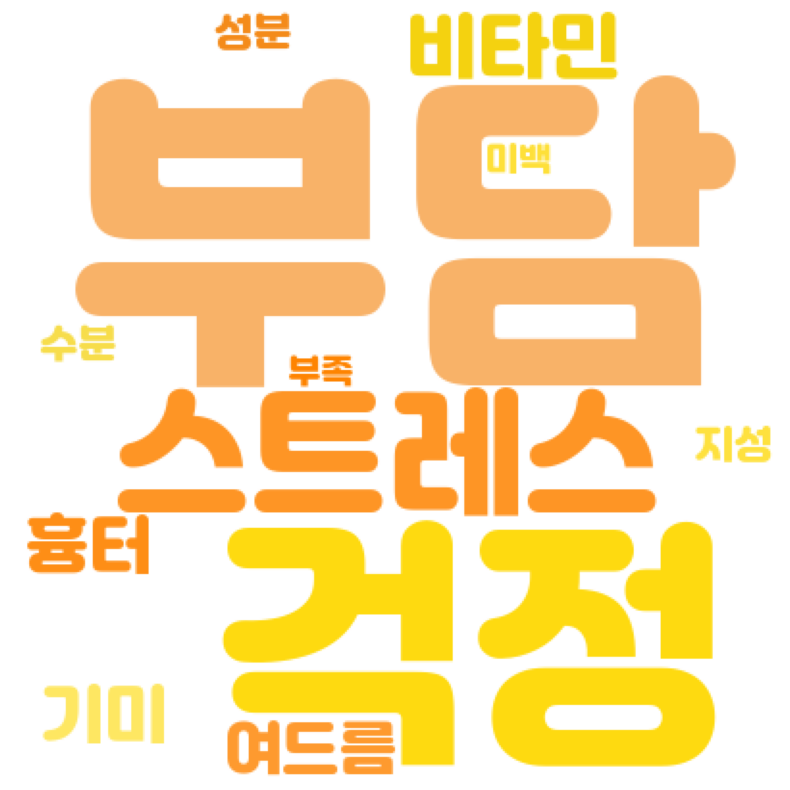

In [29]:
# 채택!!
import numpy as np
from wordcloud import WordCloud #워드클라우드 제작 라이브러리
import matplotlib.pyplot as plt  #워드클라우드 시각화 라이브러리

# 워드클라우드에서 각 단어에 적용할 색상을 결정하는 함수
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 색조(hue) 지정
    hue_choices = [31,51]    #np.random.randint(50, 100)   # 색상의 기본 톤 hsl(31, 99%, 47%)  hsl(51, 91%, 71%)
    hue = np.random.choice(hue_choices)
    # 채도(saturation) 지정
    saturation_choices = [99,91]
    saturation = np.random.choice(saturation_choices)
    
    # 밝기는 랜덤 범위로 설정
    lightness = np.random.randint(47, 71)   # 사이의 랜덤 밝기
    
    # hsl 형식으로 색상 값을 반환
    return f"hsl({hue}, {saturation}%, {lightness}%)"

font_path=r"C:\대학교\학생성장지원시스템\(탈잉)실무에 가장 많이 쓰는 PPT 디자인\Jalnan.ttf"

#wordcloud 함수 사용
wc = WordCloud(random_state=42,font_path= font_path , width = 400,
               height = 400, background_color = 'white', color_func = color_func )
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) #크기 지정하기
plt.axis('off') #축 없애기
plt.imshow(img_wordcloud) #결과 보여주기
plt.savefig('Skincare_N_negative_wordcloud') #파일 저장 

## 긍정

In [33]:
unique_positive_df_sorted


,단어,빈도
0,잘,22
1,잡티,10
2,개선,68
3,만족,99
4,되,7
5,많이,7
6,ᆸ니다,87
7,모르,6
8,너무,5
9,보습,5


In [34]:
#긍정
#불필요한 단어 제거
df_word2 = unique_positive_df_sorted.drop(index=[0,4,5,6,7,8,10,11,12,16,17,20,23])
df_word2

,단어,빈도
1,잡티,10
2,개선,68
3,만족,99
9,보습,5
13,구매,86
14,제품,5
15,여름,4
18,꾸준히,212
19,효과,96
21,크림,80


In [35]:
# DataFrame -> Dictionary
dic_word2 = df_word2.set_index('단어').to_dict()['빈도']
dic_word2

{'잡티': 10,
 '개선': 68,
 '만족': 99,
 '보습': 5,
 '구매': 86,
 '제품': 5,
 '여름': 4,
 '꾸준히': 212,
 '효과': 96,
 '크림': 80,
 '흡수': 71,
 '미백': 60}

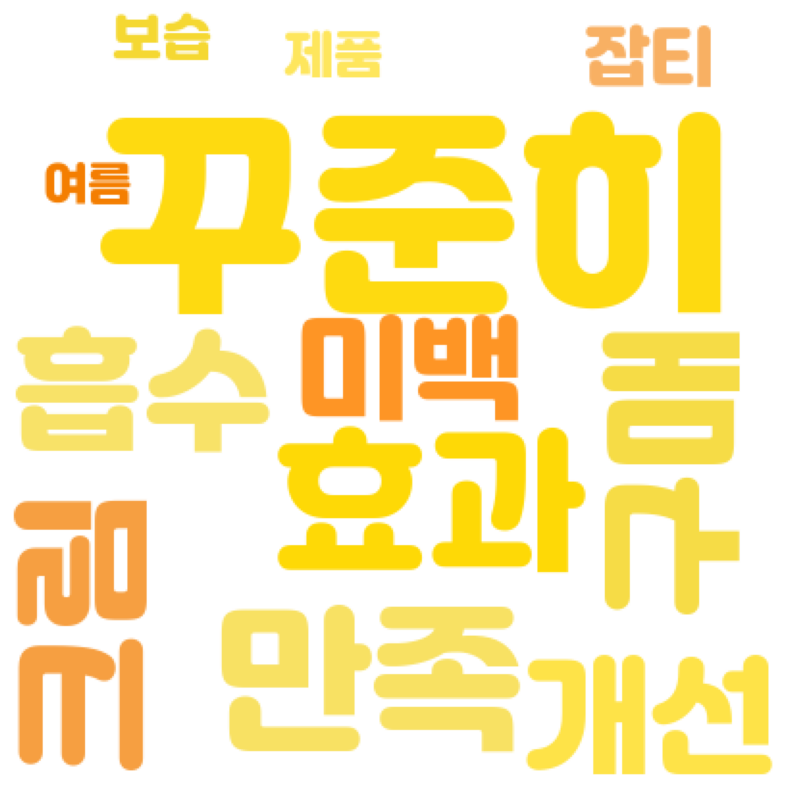

In [44]:
# 채택!!
import numpy as np
from wordcloud import WordCloud #워드클라우드 제작 라이브러리
import matplotlib.pyplot as plt  #워드클라우드 시각화 라이브러리

# 워드클라우드에서 각 단어에 적용할 색상을 결정하는 함수
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 색조(hue) 지정
    hue_choices = [31,51]    #np.random.randint(50, 100)   # 색상의 기본 톤 hsl(31, 99%, 47%)  hsl(51, 91%, 71%)
    hue = np.random.choice(hue_choices)
    # 채도(saturation) 지정
    saturation_choices = [99,91]
    saturation = np.random.choice(saturation_choices)
    
    # 밝기는 랜덤 범위로 설정
    lightness = np.random.randint(47, 71)   # 사이의 랜덤 밝기
    
    # hsl 형식으로 색상 값을 반환
    return f"hsl({hue}, {saturation}%, {lightness}%)"

font_path=r"C:\대학교\학생성장지원시스템\(탈잉)실무에 가장 많이 쓰는 PPT 디자인\Jalnan.ttf"

#wordcloud 함수 사용
wc = WordCloud(random_state=42,font_path= font_path , width = 400,
               height = 400, background_color = 'white', color_func = color_func )
img_wordcloud = wc.generate_from_frequencies(dic_word2)

plt.figure(figsize = (10, 10)) #크기 지정하기
plt.axis('off') #축 없애기
plt.imshow(img_wordcloud) #결과 보여주기
plt.savefig('Skincare_N_positive_wordcloud') #파일 저장